In [29]:
# source /g/data/oe9/login_script.sh
# module load agdc-py3-prod
# jupyter notebook
###
# gr Jan 18 2018
# read and write tif files that has 3 bands where 
# 1 = day of year
# 2 = NDVI in interger
# 3 = EVI in interger
# for phenology analysis
###
# stack (into time series) and seperate (different bands) the tif images of NDVI EVI from MODIS
# 
from osgeo import gdal
import numpy as np
import glob
import xarray as xr
import pandas as pd
# ds = gdal.Open('/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-02-18.tif')
# for bi in range(ds.RasterCount):
#     band = ds.GetRasterBand(bi + 1)
#     # Read this band into a 2D NumPy array
#     ar = band.ReadAsArray()
#     print('Band %d has type %s'%(bi + 1, ar.dtype))
#     raw = ar.tostring()


In [58]:
###
# get tif files in file folder under /g/data
# show tif names
###
# outvrt = '/g/data/oe9/user/rg6346/STACT_TIF/stacked.vrt' #/vsimem is special in-memory virtual "directory"
# outtif = '/g/data/oe9/user/rg6346/STACT_TIF/stacked.tif'

# dir = '/g/data/oe9/user/rg6346/NDVI_16D_500M/'
# tifs = glob.glob('/home/599/rg6346/Downloads/MODIS_NDVI_EVI/*.tif')
# tifs
ndvi_tifs = glob.glob('/g/data/oe9/user/rg6346/NDVI_16D_500M/*.tif')
ndvi_tifs.sort()
ndvi_tifs


# xr.concat(xr.open_dataset(tifs[0]))

['/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-02-18.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-03-05.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-03-21.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-04-06.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-04-22.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-05-08.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-05-24.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-06-09.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-06-25.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-07-11.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-07-27.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-08-12.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-08-28.tif',
 '/g/data/oe9/user/rg6346/NDVI_16D_500

In [ ]:
# dirstr = '/g/data/oe9/user/rg6346/NDVI_stack'
# namebyyear = dirstr+'/NDVI-'+str(band)+'-'+tif.split('_')[5]
# NDVI_each = glob.glob(dirstr+'NDVI-1-'+'20??-??-??.tif')
# NDVI_each.sort()
ymd_ndvi = [f.rstrip('.tif')[-10:] for f in ndvi_tifs]
ymd_ndvi = pd.to_datetime(ymd_ndvi, format='%Y-%m-%d')
ymd_ndvi.name = 'time'
ymd_ndvi
NDVI_all = xr.concat([xr.open_rasterio(tif) for tif in ndvi_tif])
NDVI_all

In [ ]:
NDVI_all = xr.concat([xr.open_rasterio(tif) for tif in ndvi_tif])
NDVI_all

In [59]:
# function form Ning Liu to write raster bands to new tif
import gdal, ogr, os, osr
import numpy as np


def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]
    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Int16)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

def main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    reversed_arr = array[::-1] # reverse array so the tif looks like the array
    array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr) # convert array to raster

In [39]:
# read raster in tifs (which is a list of tif file path+names) using xr.open_rasterio to a variable a
# from raster a select band No.1 (NDVI in this case) and No.2 (EVI in this case)
# use the funtion above to write and save each band in name "dirstr/NDVI+band+time.tif"

# for tif in tifs:
#     a=xr.open_rasterio(tif)
#     for band in [1,2]:
#         aa=a.isel(band=band)
#         dirstr = '/g/data/oe9/user/rg6346/STACT_TIF' # destination path
#         name_ndvi = dirstr +'/NDVI-'+str(band)+'-'+tif.split('_')[5]
#         array2raster(rasterOrigin=[138.6,-24.59],pixelWidth=0.004162008945837755,pixelHeight=-0.004162008945837755,newRasterfn=name_ndvi,array=aa.values)
    

RasterioIOError: '/' not recognized as a supported file format. 

In [60]:
test = ndvi_tifs[0]
test
# for tif in tifs:
    
a=xr.open_rasterio(test)
a
for band in [1,2]:
    aa=a.isel(band=band)
    dirstr = '/g/data/oe9/user/rg6346' # destination path
    name_ndvi = dirstr+'/NDVI-'+str(band)+'-'+tif.split('_')[5]
    array2raster(rasterOrigin=[138.6,-24.59],pixelWidth=0.004162008945837755,pixelHeight=-0.004162008945837755,newRasterfn=name_ndvi,array=aa.values)

# a= xr.open_rasterio(tifs[0])
# a
name_ndvi

'/g/data/oe9/user/rg6346/NDVI-2-2001-02-18.tif'

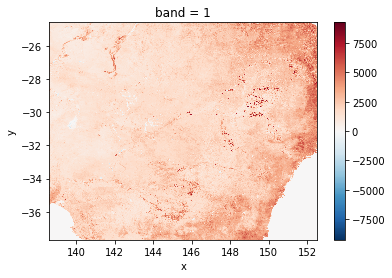

In [61]:
t1 = xr.open_rasterio(name_ndvi)
# t1
%matplotlib inline
t1.plot()
# xx = xr.open_rasterio(test)
# xx.isel(band =1 )
# # t.plot()

/g/data/oe9/user/rg6346


'/g/data/oe9/user/rg6346/NDVI-1-2000-02-18.tif'

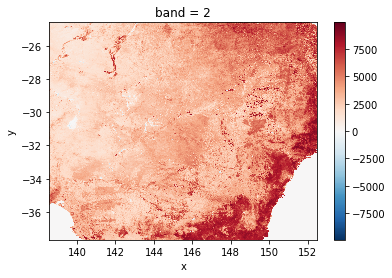

In [41]:
# aa=a.isel(band=1)
# aa.plot()
# dirstr = '/g/data/oe9/user/rg6346' # destination path
# print(dirstr)
# name_ndvi = dirstr +'/NDVI-'+str(1)+'-'+tifs[0].split('_')[5]
# name_ndvi
# array2raster(rasterOrigin=[138.6,-24.59],pixelWidth=0.004162008945837755,pixelHeight=-0.004162008945837755,newRasterfn=name_ndvi,array=aa.values)
# name_ndvi

In [57]:
# xr.concat(xr.open_dataset(tifs[0]))
test1 = tifs[0]
test2 = tifs[1]
testX = [test1, test2]
NDVI_all = xr.concat([xr.open_rasterio(test) for test in testX])
NDVI_all

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: the `dim` argument to `concat` will be required in a future version of xarray; for now, setting it to the old default of 'concat_dim'
  """


<xarray.DataArray (concat_dims: 2, band: 3, y: 3147, x: 3346)>
array([[[[  63, ...,    0],
         ..., 
         [   0, ...,    0]],

        ..., 
        [[1014, ...,    0],
         ..., 
         [   0, ...,    0]]],


       [[[  79, ...,    0],
         ..., 
         [   0, ...,    0]],

        ..., 
        [[ 981, ...,    0],
         ..., 
         [   0, ...,    0]]]], dtype=int16)
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * x        (x) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
Dimensions without coordinates: concat_dims
Attributes:
    crs:        +init=epsg:4326
    res:        (0.004162008945837755, 0.004162008945837755)
    is_tiled:   1
    transform:  (0.004162008945837755, 0.0, 138.5657638337764, 0.0, -0.004162...

In [45]:

# x=xr.open_rasterio(name_ndvi,dty)

ymd_ndvi = [f.rstrip('.tif')[-10:] for f in NDVI_each]
ymd_ndvi = pd.to_datetime(ymd_ndvi, format='%Y-%m-%d')
ymd_ndvi.name = 'time'
ymd_ndvi

NameError: name 'dty' is not defined

'/g/data/oe9/user/rg6346/NDVI_16D_500M/MOD13A1_005_NDVI_2000-02-18.tif'

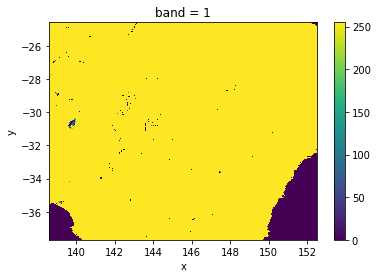

In [38]:
# plot the last band in the last tif file
%matplotlib inline
x.plot()

In [21]:
dirstr = '/g/data/oe9/user/rg6346/STACT_TIF/'
NDVI_each = glob.glob(dirstr+'NDVI-1-'+'????-??-??.tif')
NDVI_each.sort()
EVI_each = glob.glob(dirstr+'NDVI-2-'+'????-??-??.tif')
EVI_each.sort()
EVI_each
A = xr.open_rasterio(EVI_each[0])
A
# tifs[0].split('_')[5]+str(1)

<xarray.DataArray (band: 1, y: 3147, x: 3346)>
[10529862 values with dtype=uint8]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -11.49 -11.49 -11.48 -11.48 -11.47 -11.47 -11.47 ...
  * x        (x) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
Attributes:
    crs:        +init=epsg:4326
    res:        (0.004162008945837755, -0.004162008945837755)
    is_tiled:   0
    transform:  (0.004162008945837755, 0.0, 138.6, 0.0, 0.004162008945837755,...

In [13]:
# extract date according to the file names
ymd_ndvi = [f.rstrip('.tif')[-10:] for f in NDVI_each]
ymd_ndvi = pd.to_datetime(ymd_ndvi, format='%Y-%m-%d')
ymd_ndvi.name = 'time'
ymd_ndvi
ymd_evi = [f.rstrip('.tif')[-10:] for f in NDVI_each]
ymd_evi = pd.to_datetime(ymd_evi, format='%Y-%m-%d')
ymd_evi.name = 'time'
ymd_evi

DatetimeIndex(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
               '2000-04-22', '2000-05-08', '2000-05-24', '2000-06-09',
               '2000-06-25', '2000-07-11',
               ...
               '2013-07-28', '2013-08-13', '2013-08-29', '2013-09-14',
               '2013-09-30', '2013-10-16', '2013-11-01', '2013-11-17',
               '2013-12-03', '2013-12-19'],
              dtype='datetime64[ns]', name='time', length=319, freq=None)

In [14]:
# stack NDVI and EVI tifs according to yyyymmdd
# all_tifs = xr.concat([xr.open_rasterio(tif) for tif in tifs], dim=dates)
# all_tifs
NDVI_all = xr.concat([xr.open_rasterio(ndvi) for ndvi in NDVI_each], dim = ymd_ndvi)
EVI_all  = xr.concat([xr.open_rasterio(evi) for evi in EVI_each], dim = ymd_evi)
EVI_all


/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


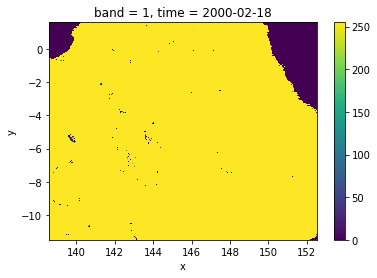

In [19]:
%matplotlib inline
EVI_all[0].plot()
# EVI_all[0]

In [25]:
EVI_all



(3147, 3346)

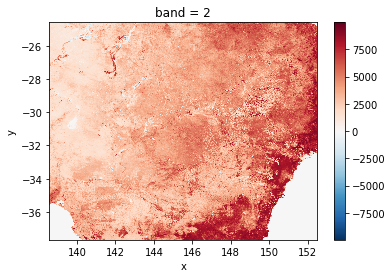

In [28]:
# %matplotlib inline
# a.plot()

In [26]:
# array2raster(rasterOrigin=[138.6,-24.59],pixelHeight=0.004162008945837755,pixelWidth=0.004162008945837755,newRasterfn='test.tif',array=aa)

In [6]:
# tifs

['/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-02-18.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-03-05.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-03-21.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-04-06.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-04-22.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-05-24.tif',
 '/home/599/rg6346/Downloads/MODIS_NDVI_EVI/MOD13A1_005_NDVI_2000-05-08.tif']

In [7]:
dates = [f.rstrip('.tif')[-10:] for f in tifs]
dates = pd.to_datetime(dates, format='%Y-%m-%d')
dates.name = 'time'
dates

DatetimeIndex(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
               '2000-04-22', '2000-05-24', '2000-05-08'],
              dtype='datetime64[ns]', name='time', freq=None)

In [8]:
all_tifs = xr.concat([xr.open_rasterio(tif) for tif in tifs], dim=dates)
all_tifs

<xarray.DataArray (time: 7, band: 3, y: 3147, x: 3346)>
array([[[[  63, ...,    0],
         ..., 
         [   0, ...,    0]],

        ..., 
        [[1014, ...,    0],
         ..., 
         [   0, ...,    0]]],


       ..., 
       [[[ 129, ...,    0],
         ..., 
         [   0, ...,    0]],

        ..., 
        [[1097, ...,    0],
         ..., 
         [   0, ...,    0]]]], dtype=int16)
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * x        (x) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Attributes:
    crs:        +init=epsg:4326
    res:        (0.004162008945837755, 0.004162008945837755)
    is_tiled:   1
    transform:  (0.004162008945837755, 0.0, 138.5657638337764, 0.0, -0.004162...

In [10]:
# import phenology
# from PIL import Image, ImageOps
# import numpy as np
# import matplotlib.pyplot as plt
# from datetime import datetime, timedelta